<img src="../images/CONFIDENT DATA SCIENCE.png" alt="An image that reads Confident Data Science: The Essential Skills of Data Science, Companion Jupyter Notebook + Coding Examples. Also shows book image."/>

## Chapter 8 *One Weekend Crash Course*

To give citation to these coding examples give reference to an appropriate chapter and page of:

*Confident Data Science: Discover the essential skills of data science* <br>
(Confident Series, 15) 1st Edition by Adam Ross Nelson (Author) <br>
Publisher : Kogan Page (September 26, 2023).

## What Is Sentiment Analysis

In [1]:
# Import the Pandas and the NLTK libraries
import pandas as pd
import nltk

# Necessary for the first run only (downloading the dictionary)
nltk.download('vader_lexicon')

# Import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load VADER lexicon
vader_lexicon = SentimentIntensityAnalyzer().lexicon

# Specify a list of adjectives
adjectives = [
    'Adoringly', 'Brave', 'Creative', 'Daring', 'Doomed', 'Energetic', 
    'Friendly', 'Generous', 'Grin', 'Honest', 'Intelligent', 'Joyful', 
    'Kind', 'Lost', 'Loyal', 'Magnificent', 'Noble', 'Optimistic', 
    'Playful', 'Questionable', 'Rebellious', 'Strong', 'Trick', 
    'Trustworthy', 'Unkind', 'Verdict', 'Wreck', 'Worry', 'Youthful', 
    'Zealot']

# Declare empty lists to be populated in the for loop
word_col = []
sent_col = []

# Use for loop to populate list
for word in adjectives:
    word_col.append(word)
    sent_col.append(vader_lexicon[word.lower()])

# Convert lists to Pandas DataFrame for display
pd.DataFrame({'Word 1':word_col[:10], 'Sentiment 1':sent_col[:10],
              'Word 2':word_col[10:20], 'Sentiment 2':sent_col[10:20],
              'Word 3':word_col[20:], 'Sentiment 3':sent_col[20:]})


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adamrossnelson/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Word 1,Sentiment 1,Word 2,Sentiment 2,Word 3,Sentiment 3
0,Adoringly,2.4,Intelligent,2.0,Rebellious,-1.2
1,Brave,2.4,Joyful,2.9,Strong,2.3
2,Creative,1.9,Kind,2.4,Trick,-0.2
3,Daring,1.5,Lost,-1.3,Trustworthy,2.6
4,Doomed,-3.2,Loyal,2.1,Unkind,-1.6
5,Energetic,1.9,Magnificent,2.9,Verdict,0.6
6,Friendly,2.2,Noble,2.0,Wreck,-1.9
7,Generous,2.3,Optimistic,1.3,Worry,-1.9
8,Grin,2.1,Playful,1.9,Youthful,1.3
9,Honest,2.3,Questionable,-1.2,Zealot,-1.9


In [5]:
# View the most positive lexicon words
pd.DataFrame({'Words':vader_lexicon.keys(),
              'Sents':vader_lexicon.values()}
            ).sort_values('Sents', ascending=False).head(10)

,Words,Sents
267,ilu,3.4
269,ily,3.4
205,aml,3.4
4541,magnificently,3.4
6539,sweetheart,3.3
2633,euphoria,3.3
305,lya,3.3
2470,ecstacy,3.3
1366,cheerfullest,3.2
1054,best,3.2


## Standard Imports

In [27]:
# Import the Pandas NumPy and Seaborn libraries
import pandas as pd
import numpy as np
import seaborn as sns


## Using Google Cloud's NLP API

In [20]:
# Additionally import Google cloud libraries
from google.cloud import language_v1
from google.protobuf.json_format import MessageToDict


### A One Sentence Example

In [22]:
# Specify a services.json location
sl = '../services/services.json'

In [ ]:
# Instantiate a google Cloud client
client = language_v1.LanguageServiceClient.from_service_account_json(sl)

# Save text to a variable
my_text = 'I am happy to announce a promotion at work!'

# Create a Google Cloud document from the text
document = language_v1.Document(content=my_text, 
                                type_=language_v1.Document.Type.PLAIN_TEXT)

# Send the document to Google's API
a_sentiment = client.analyze_sentiment(document=document)


In [ ]:
# Further inspect above code with the type() function
print(f'The type of the document is {type(document)}')

print(f'The type of the a_sentiment is {type(a_sentiment)}')


In [ ]:
# Save and then display the results of the API call
result_dict = MessageToDict(a_sentiment.__class__.pb(a_sentiment))

# Evaluate the results for display
result_dict


In [ ]:
# Code to print the document's overall sentiment score.
print('Doc Sentiment : {}'.format(result_dict['documentSentiment']
                                  ['score']))

# Code to print the document's sentiment magnitude score.
print('Doc Magnitude : {}'.format(result_dict['documentSentiment']
                                  ['magnitude']))


### Sentence-Level Examples

In [17]:
def google_api_sentence_scores(series: pd.Series) -> pd.DataFrame:
    """Returns sentiment scores of all sentences of a given Pandas 
    Series that contains text using the Google Cloud API.

    Takes the text data contained within a provided Pandas Series and 
    returns a DataFrame reporting sentiment scores for each sentence in 
    the original Series. The DataFrame will have an index that matches
    the Series index.

    Parameters
    ----------
    series : pd.Series
        Pandas Series containing text data to be analyzed by the Google 
        Cloud API.
    
    Returns
    ----------
    scores_df : pd.DataFrame
        DataFrame reporting each sentence's resulting sentiment scores.
    """

    # Instantiate Google Cloud API's client
    client = language_v1.LanguageServiceClient.from_service_account_json(sl)

    # Define lists that will contain each sentence’s sentimento results.
    index = []
    sentences = []
    sentiments = []
    magnitudes = []

    # Loop through each Series item; have Google Cloud API analyze 
    # sentiment scores
    for i in series.index:
    
        # Take the next item in the Pandas Series
        my_text = series.loc[i]
        # Create a Google Cloud document from the text
        document = language_v1.Document(content=my_text, 
                                        type_=language_v1.Document.Type.PLAIN_TEXT)
        # Send the document to Google's API
        a_sentiment = client.analyze_sentiment(document=document)
        # Save the results of the API call as a Python dictionary
        a_sentiment_dict = MessageToDict(a_sentiment.__class__.pb(a_sentiment))

        # Extract scores for each sentence and append to respective list
        try:
            # Iterate through each sentence
            for s in a_sentiment_dict['sentences']:

                    # Append the sentiments list
                    sentiments.append(s['sentiment']['score'])
                    # Append the magnitude list
                    magnitudes.append(s['sentiment']['magnitude'])
                    # Append the original sentence
                    sentences.append(s['text']['content'])
                    # Append the index list
                    index.append(i)
        
        # When there is an error, skip that entry.
        except:
            pass

    # Compile results of the entire analysis in easily-readable Pandas df
    scores_df = pd.DataFrame({'index':index,
                              'Sentence':sentences,
                              'Sentiment':sentiments,
                              'Magnitude':magnitudes}).set_index('index')

    # Return the resulting DataFrame
    return scores_df


In [ ]:
df = google_api_sentence_scores(
                    pd.Series(
                            ['I was not a fan of The Hobbit. This is not a fav.',
                            'What were you thinking? That is a bad idea.']))

# Display the result
df


### Document-Level Examples

In [ ]:
# Aggregate and group the scores by the index for document level results
df.groupby(by='index').mean()


In [18]:
def google_api_document_scores(series: pd.Series) -> pd.DataFrame:
    """Returns sentiment scores of a given text using the Google 
    Cloud API.

    Takes the text data contained within the provided Pandas Series 
    and returns a DataFrame reporting sentiment scores for each item
    in the original Series. The DataFrame will have an index that matches
    the Series index.

    Parameters
    ----------
    series : pd.Series
        Pandas Series containing text data to be analyzed by the Google Cloud API.
    
    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting sentiment scores.
    """

    # Instantiate Google Cloud API's client
    client = language_v1.LanguageServiceClient.from_service_account_json(sl)

    # Define lists that will contain each sentence’s sentimento results.
    index = []
    documents = []
    doc_sentiment_scores = []
    doc_magnitude_scores = []

    # Loop through each Series item; have Google Cloud API analyze 
    # sentiment scores
    for i in series.index:

        # Take the next item in the Pandas Series
        my_text = series.loc[i]  
        # Create a Google Cloud document from the text
        document = language_v1.Document(content=my_text, 
                                        type_=language_v1.Document.Type.PLAIN_TEXT)
        # Send the document to Google's API
        a_doc_sentiment = client.analyze_sentiment(request={'document':document}).document_sentiment

        # Extract sentment and magnitude scores for each document
        doc_magnitude = a_doc_sentiment.magnitude
        doc_score = a_doc_sentiment.score
        
        # Append scores to respective lists; The origianl text
        documents.append(my_text)
        # Append the sentiment scores
        doc_sentiment_scores.append(doc_score)
        # Append the magnitude scores
        doc_magnitude_scores.append(doc_magnitude)
        # Append the index list
        index.append(i)

    # Compile results of the entire analysis in easily-readable Pandas df
    doc_scores_df = pd.DataFrame({'index':index,
                             'Documents':documents,
                             'Sentiment':doc_sentiment_scores,
                             'Magnitude':doc_magnitude_scores}).set_index('index')

    # Return the resulting DataFrame
    return doc_scores_df


In [ ]:
# Store the results of the sentimento analysis in a new DataFrame
df = google_api_document_scores(
            pd.Series(['I was not a fan of The Hobbit. This is not a fav.',
                       'What were you thinking? That is a bad idea.']))

# Display the result
df


## Using Natural Lanauge Tool Kit (NLTK)

In [6]:
# Import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import NLTK's sentence tokenizer
from nltk.tokenize import sent_tokenize


If you have not yet worked with the `nltk.sentiment.vader` and its `SentimentIntensityAnalyzer` you will also need to add to your computing environment the `vader_lexicon` with the following one-time code executions.

```Python
# Import the Natrual Language Toolkit Library
import nltk

# Necessary for the first run only (downloading the dictionary)
nltk.download('vader_lexicon')
```

## Short Examples

In [7]:
# Instantiate the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Execute sentiment analysis with the sentiment analyzer
sid.polarity_scores('I am happy to announce a promotion at work!')

{'neg': 0.0, 'neu': 0.6, 'pos': 0.4, 'compound': 0.6114}

In [8]:
# Execute sentiment analysis with the sentiment analyzer
sid.polarity_scores('''I am happy to announce a promotion at work!
                    This makes be very happy because I hated my 
                    former tasks. The past few years were tough and
                    I was sad or depressed all the time1 I do not
                    like to complain much becuase I am happy to
                    have any job. I know what it is like to be
                    unemployed and it is also not fun. Next year
                    I anticiate growing and loving my new work!''')

{'neg': 0.214, 'neu': 0.583, 'pos': 0.203, 'compound': 0.2751}

In [9]:
# Execute sentiment analysis with the sentiment analyzer
sid.polarity_scores('I am happy to announce a promotion at work.')

{'neg': 0.0, 'neu': 0.619, 'pos': 0.381, 'compound': 0.5719}

## Sentence-Level Examples

In [10]:
# Name the function sentence_scores
def sentence_scores(series: pd.Series) -> pd.DataFrame:
    '''Returns sentiment scores of a given text using NLTK’s
    VADER sentiment analysis tools.

    Takes a Pandas Series that contains text data. Returns a 
    Pandas DataFrame that reports sentiment scores for each 
    sentence in the original Series. The DataFrame will have 
    an index that matches the Series index.

    Parameters
    ----------
    Series : pd.Series
        Pandas Series containing text data to be analyzed using
        NLTK’s VADER sentiment analysis tools.

    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting sentiment scores.
    '''

    # Define empty lists that will contain each sentence’s results.
    index = []
    sentences = []
    neg_scores = []
    neu_scores = []
    pos_scores = []
    compounds = []
    
    # Instantiate the VADER analyzer.
    sid = SentimentIntensityAnalyzer()
    
    # Loop through each item in the Series.
    for i in series.index:
        
        # Loop through each sentence in the Series item.
        for s in sent_tokenize(series.loc[i]):

            # Extract scores for each sentence; append to lists.
            try:
                
                # Get sentiment scores from NLTK
                scores = sid.polarity_scores(s)
                # Append the index list
                index.append(i)
                # Append the original text
                sentences.append(s)
                # Append the negative scores list
                neg_scores.append(scores['neg'])
                # Append the neutral scores list
                neu_scores.append(scores['neu'])
                # Append the positive scores list
                pos_scores.append(scores['pos'])
                # Append the positive scores list
                compounds.append(scores['compound'])

            # When there is an error, skip that entry.
            except:
                pass
    
    # Compile & return Pandas DataFrame
    return(pd.DataFrame({'index':index,
                         'Sentence':sentences,
                         'Negative':neg_scores,
                         'Neutral':neu_scores,
                         'Positive':pos_scores,
                         'Compound':compounds}).set_index('index'))


In [11]:
# Store the results of the sentiment analysis in a new DataFrame
df = sentence_scores(
            pd.Series(['I was not a fan of The Hobbit. This is not a fav.',
                       'What were you thinking? That is a bad idea.']))

# Display the result
df


,Sentence,Negative,Neutral,Positive,Compound
index,,,,,
0,I was not a fan of The Hobbit.,0.282,0.718,0.0,-0.2411
0,This is not a fav.,0.453,0.547,0.0,-0.3570
1,What were you thinking?,0.000,1.000,0.0,0.0000
1,That is a bad idea.,0.538,0.462,0.0,-0.5423


## Document Level Examples

In [12]:
# Aggregate and group the scores by the index for document level results
df.groupby(by='index').mean()


,Negative,Neutral,Positive,Compound
index,,,,
0,0.3675,0.6325,0.0,-0.29905
1,0.2690,0.7310,0.0,-0.27115


In [13]:
# Name the function post_scores
def post_scores(series: pd.Series) -> pd.DataFrame:
    '''Returns sentiment scores of a given text using NLTK’s
    VADER sentiment analysis tools.

    Takes a Pandas Series that contains text data. Returns a 
    Pandas DataFrame that reports sentiment scores for item
    withi the Pandas Seires. The DataFrame will havean index 
    that matches the Series index.
    
    Parameters
    ----------
    Series : pd.Series
        Pandas Series containing text data to be analyzed using
        NLTK’s VADER sentiment analysis tools.

    Returns
    ----------
    doc_scores_df : pd.DataFrame
        DataFrame reporting each document's resulting sentiment scores.
    '''

    # Define empty lists that will contain each entry’s result.
    index = []
    posts = []
    neg_scores = []
    neu_scores = []
    pos_scores = []
    compounds = []
    
    # Instantiate the analyzer.
    sid = SentimentIntensityAnalyzer()
    
    # Loop through each item in the Series.
    for i in series.index:

        # Extract scores for each sentence; append to lists.
        try:
            # Get sentiment scores from NLTK
            scores = sid.polarity_scores(series.loc[i])
            # Append the index list
            index.append(i)
            # Append the original text
            posts.append(series.loc[i])
            # Append the negative scores list
            neg_scores.append(scores['neg'])
            # Append the neutral scores list
            neu_scores.append(scores['neu'])
            # Append the positive scores list
            pos_scores.append(scores['pos'])
            # Append the positive scores list
            compounds.append(scores['compound'])
        
        # When there is an error, skip that entry.
        except:
            pass
    
    # Compile & return Pandas DataFrame
    return(pd.DataFrame({'index':index,
                         'Sentence':posts,
                         'Negative':neg_scores,
                         'Neutral':neu_scores,
                         'Positive':pos_scores,
                         'Compound':compounds}).set_index('index'))


In [14]:
# Store the results of the sentiment analysis in a new DataFrame
df = post_scores(
            pd.Series([
                'I was not a fan of The Hobbit. This is not a fav.',
                'What were you thinking? That is a bad idea.']))

# Display the result
df


,Sentence,Negative,Neutral,Positive,Compound
index,,,,,
0,I was not a fan of The Hobbit. This is not a fav.,0.357,0.643,0.0,-0.5334
1,What were you thinking? That is a bad idea.,0.333,0.667,0.0,-0.5423


## Comparing The Results

In [15]:
# Prepare data to cross-compare between Google and NLTK
text_data = pd.Series([
    'I am happy to announce a promotion at work!',
    'I am happy to announce a promotion at work.',
    'I was not a fan of The Hobbit. This is not a fav.',
    'What were you thinking? That is a bad idea.',
    'My gift for you: @>-->--',
    'The Confident Series is a must read you will love it.',
    'Video games can sometimes destroy productivity.',
    'VADER sentiment analysis is extremely effect.ve',
    'Google also has a sentiment analysis API.',
    'Nothing ever works out for me.',
    'I never get a break.',
    'We always mess things up.',
    'Nothing good ever comes my way.',
    'You are so unlucky.',
    'No one understands me.',
    'Everything is going wrong today.',
    'It just is not fair!',
    'I can accomplish anything!',
    'Data Science is your destiny',
    'Nothing can stop me if I put my mind to it.',
    'I am grateful for everything that comes my way.',
    'I am killing it in the Data Science classes right now.'])


In [23]:
# Retrieve sentiment score results from NLTK
results_nltk = post_scores(text_data)

# Retrieve sentiment score results from Google API
results_google = google_api_document_scores(text_data)

# Append '_nltk' to the columns in the NLTK results
results_nltk = results_nltk.add_suffix('_nltk')

# Append '_ggl' to the columns in the Google results
results_google = results_google.add_suffix('_ggl')


In [24]:
# Concatenate results from both NLTK and Google
combined = pd.concat([
    results_nltk, 
    results_google[['Sentiment_ggl', 
                    'Magnitude_ggl']]],
    axis=1)

# Create a column that flags if NLTK and Google agreed
combined['Agree'] = (combined['Compound_nltk'] >= 0) == \
                    (combined['Sentiment_ggl'] >= 0)
    
# Display the results (focusing on NLTK's compund, and Google's Sentiment)
combined[['Sentence_nltk', 'Compound_nltk', 'Sentiment_ggl','Agree']]


,Sentence_nltk,Compound_nltk,Sentiment_ggl,Agree
index,,,,
0,I am happy to announce a promotion at work!,0.6114,0.9,True
1,I am happy to announce a promotion at work.,0.5719,0.9,True
2,I was not a fan of The Hobbit. This is not a fav.,-0.5334,-0.8,True
3,What were you thinking? That is a bad idea.,-0.5423,-0.7,True
4,My gift for you: @>-->--,0.7184,0.3,True
5,The Confident Series is a must read you will l...,0.8126,0.9,True
6,Video games can sometimes destroy productivity.,-0.5423,-0.7,True
7,VADER sentiment analysis is extremely effect.ve,0.0000,0.0,True
8,Google also has a sentiment analysis API.,0.0000,0.2,True


In [25]:
# Produce a correlation matrix to compare NLTK and Google results
combined.corr()

,Negative_nltk,Neutral_nltk,Positive_nltk,Compound_nltk,Sentiment_ggl,Magnitude_ggl,Agree
Negative_nltk,1.000000,-0.360246,-0.513841,-0.816384,-0.734155,0.254446,0.260561
Neutral_nltk,-0.360246,1.000000,-0.615176,-0.176244,-0.115210,-0.344910,-0.453893
Positive_nltk,-0.513841,-0.615176,1.000000,0.852034,0.726410,0.102150,0.197205
Compound_nltk,-0.816384,-0.176244,0.852034,1.000000,0.829533,-0.062950,-0.006123
Sentiment_ggl,-0.734155,-0.115210,0.726410,0.829533,1.000000,-0.114057,0.325615
Magnitude_ggl,0.254446,-0.344910,0.102150,-0.062950,-0.114057,1.000000,-0.042942
Agree,0.260561,-0.453893,0.197205,-0.006123,0.325615,-0.042942,1.000000


<AxesSubplot:xlabel='Sentiment_ggl', ylabel='Compound_nltk'>

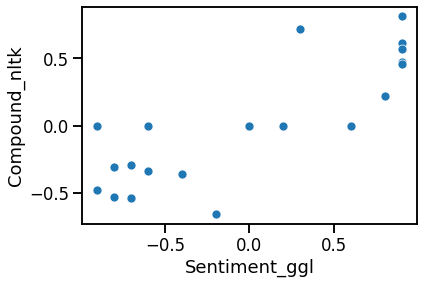

In [28]:
# Set the Seaborn context to talk for more readable formatting
sns.set_context('talk')

# User Seaborn to produce a scatterplot
sns.scatterplot(data=combined, 
                y='Compound_nltk',
                x='Sentiment_ggl')

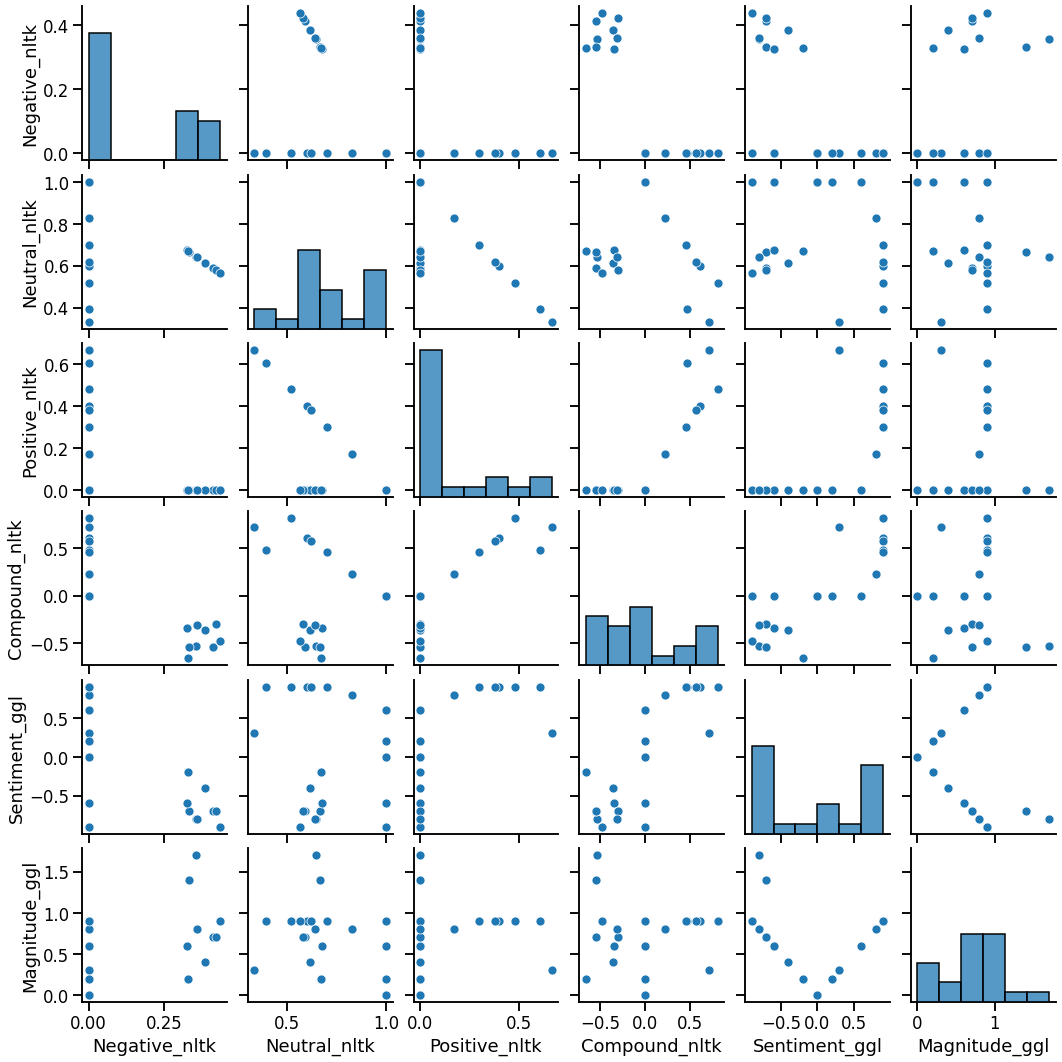

In [31]:
# See the pairplot for this combined data
sns.pairplot(combined[['Sentence_nltk', 'Negative_nltk', 
                       'Neutral_nltk', 'Positive_nltk',
                       'Compound_nltk', 'Sentiment_ggl',
                       'Magnitude_ggl']])

## Update + Change Log

March, 2023 - Created notebook.<br>
April, 2023 - Prepared for GitHub.